# Financial Data Collection - EXPANDED DATASET

This notebook downloads historical financial data for the project.

**Data Sources (25 assets for top-tier publication quality):**
- **Stock indices** (7): S&P 500, NASDAQ, Dow Jones, FTSE 100, Nikkei 225, Hang Seng, DAX
- **Individual stocks** (11): AAPL, MSFT, GOOGL, AMZN, TSLA, JPM, XOM, JNJ, Visa, Walmart, P&G
- **Cryptocurrencies** (5): BTC, ETH, BNB, SOL, ADA
- **Commodities** (3): Gold futures, VIX (volatility), Crude Oil

**Time Period:** 2015-01-01 to 2024-12-31 (10 years of daily data)

**Expansion Rationale:**
- **Global coverage**: US, UK, Japan, China, Germany
- **Sector diversity**: Tech, Finance, Energy, Healthcare, Payments, Retail, Consumer Goods
- **Alternative assets**: 5 cryptocurrencies, commodities, volatility index
- **Publication quality**: 25 assets ideal for top-tier conference publication

## 1. Import Libraries

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Configuration

In [12]:
# Define data parameters
START_DATE = '2015-01-01'
END_DATE = '2024-12-31'

# Define tickers to download - EXPANDED DATASET for publication quality (25 assets)
TICKERS = {
    'indices': ['^GSPC', '^IXIC', '^DJI', '^FTSE', '^N225', '^HSI', '^GDAXI'],  # S&P 500, NASDAQ, Dow Jones, FTSE, Nikkei, Hang Seng, DAX
    'stocks': ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JPM', 'XOM', 'JNJ', 'V', 'WMT', 'PG'],  # Tech, Finance, Energy, Healthcare, Payments, Retail, Consumer
    'crypto': ['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD', 'ADA-USD'],  # Major cryptocurrencies
    'commodities': ['GC=F', '^VIX', 'CL=F']  # Gold, VIX, Crude Oil
}

# Output directory
RAW_DATA_DIR = '../../data/raw'
os.makedirs(RAW_DATA_DIR, exist_ok=True)

print(f"📅 Date Range: {START_DATE} to {END_DATE}")
print(f"📊 Total tickers to download: {sum(len(v) for v in TICKERS.values())}")
print(f"\n📈 Asset Breakdown:")
for category, tickers in TICKERS.items():
    print(f"  - {category.capitalize()}: {len(tickers)} assets")

📅 Date Range: 2015-01-01 to 2024-12-31
📊 Total tickers to download: 26

📈 Asset Breakdown:
  - Indices: 7 assets
  - Stocks: 11 assets
  - Crypto: 5 assets
  - Commodities: 3 assets


## 3. Download Data Function

In [13]:
def download_ticker_data(ticker, start_date, end_date, save_dir):
    """
    Download historical data for a single ticker and save to CSV.
    
    Parameters:
    -----------
    ticker : str
        Ticker symbol (e.g., 'AAPL', '^GSPC')
    start_date : str
        Start date in 'YYYY-MM-DD' format
    end_date : str
        End date in 'YYYY-MM-DD' format
    save_dir : str
        Directory to save the CSV file
    
    Returns:
    --------
    pd.DataFrame or None
        Downloaded data or None if failed
    """
    try:
        print(f"📥 Downloading {ticker}...", end=' ')
        
        # Download data
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        
        if data.empty:
            print("❌ No data available")
            return None
        
        # Clean ticker name for filename (remove special characters)
        clean_ticker = ticker.replace('^', '').replace('-', '_')
        filename = os.path.join(save_dir, f"{clean_ticker}.csv")
        
        # Save to CSV
        data.to_csv(filename)
        
        print(f"✅ Saved ({len(data)} rows) → {filename}")
        return data
        
    except Exception as e:
        print(f"❌ Error: {str(e)}")
        return None

## 4. Download All Data

In [14]:
# Dictionary to store downloaded data
downloaded_data = {}

# Download each category
for category, tickers in TICKERS.items():
    print(f"\n{'='*60}")
    print(f"📂 Category: {category.upper()}")
    print(f"{'='*60}")
    
    for ticker in tickers:
        data = download_ticker_data(ticker, START_DATE, END_DATE, RAW_DATA_DIR)
        if data is not None:
            downloaded_data[ticker] = data

print(f"\n{'='*60}")
print(f"✅ Download Complete! Successfully downloaded {len(downloaded_data)} tickers")
print(f"{'='*60}")


📂 Category: INDICES
📥 Downloading ^GSPC... ✅ Saved (2515 rows) → ../../data/raw\GSPC.csv
📥 Downloading ^IXIC... ✅ Saved (2515 rows) → ../../data/raw\IXIC.csv
📥 Downloading ^DJI... ✅ Saved (2515 rows) → ../../data/raw\DJI.csv
📥 Downloading ^FTSE... ✅ Saved (2524 rows) → ../../data/raw\FTSE.csv
📥 Downloading ^N225... ✅ Saved (2524 rows) → ../../data/raw\FTSE.csv
📥 Downloading ^N225... ✅ Saved (2445 rows) → ../../data/raw\N225.csv
📥 Downloading ^HSI... ✅ Saved (2445 rows) → ../../data/raw\N225.csv
📥 Downloading ^HSI... ✅ Saved (2459 rows) → ../../data/raw\HSI.csv
📥 Downloading ^GDAXI... ✅ Saved (2459 rows) → ../../data/raw\HSI.csv
📥 Downloading ^GDAXI... ✅ Saved (2537 rows) → ../../data/raw\GDAXI.csv

📂 Category: STOCKS
📥 Downloading AAPL... ✅ Saved (2515 rows) → ../../data/raw\AAPL.csv
📥 Downloading MSFT... ✅ Saved (2515 rows) → ../../data/raw\MSFT.csv
📥 Downloading GOOGL... ✅ Saved (2515 rows) → ../../data/raw\GOOGL.csv
📥 Downloading AMZN... ✅ Saved (2515 rows) → ../../data/raw\AMZN.cs

## 5. Data Summary

In [15]:
# Create summary dataframe
summary_data = []

for ticker, data in downloaded_data.items():
    # Handle MultiIndex columns (flatten if needed)
    if isinstance(data.columns, pd.MultiIndex):
        columns_str = ', '.join([str(col) for col in data.columns])
    else:
        columns_str = ', '.join(data.columns)
    
    summary_data.append({
        'Ticker': ticker,
        'Rows': len(data),
        'Start Date': data.index.min().strftime('%Y-%m-%d'),
        'End Date': data.index.max().strftime('%Y-%m-%d'),
        'Missing Values': data.isnull().sum().sum(),
        'Columns': columns_str
    })

summary_df = pd.DataFrame(summary_data)
print("\n📊 Data Summary:")
print(summary_df.to_string(index=False))

# Save summary
summary_df.to_csv(os.path.join(RAW_DATA_DIR, '_data_summary.csv'), index=False)
print(f"\n💾 Summary saved to {RAW_DATA_DIR}/_data_summary.csv")


📊 Data Summary:
 Ticker  Rows Start Date   End Date  Missing Values                                                                                                   Columns
  ^GSPC  2515 2015-01-02 2024-12-30               0           ('Close', '^GSPC'), ('High', '^GSPC'), ('Low', '^GSPC'), ('Open', '^GSPC'), ('Volume', '^GSPC')
  ^IXIC  2515 2015-01-02 2024-12-30               0           ('Close', '^IXIC'), ('High', '^IXIC'), ('Low', '^IXIC'), ('Open', '^IXIC'), ('Volume', '^IXIC')
   ^DJI  2515 2015-01-02 2024-12-30               0                ('Close', '^DJI'), ('High', '^DJI'), ('Low', '^DJI'), ('Open', '^DJI'), ('Volume', '^DJI')
  ^FTSE  2524 2015-01-02 2024-12-30               0           ('Close', '^FTSE'), ('High', '^FTSE'), ('Low', '^FTSE'), ('Open', '^FTSE'), ('Volume', '^FTSE')
  ^N225  2445 2015-01-05 2024-12-30               0           ('Close', '^N225'), ('High', '^N225'), ('Low', '^N225'), ('Open', '^N225'), ('Volume', '^N225')
   ^HSI  2459 2015-01-02 2024-12-30

## 6. Quick Visualization

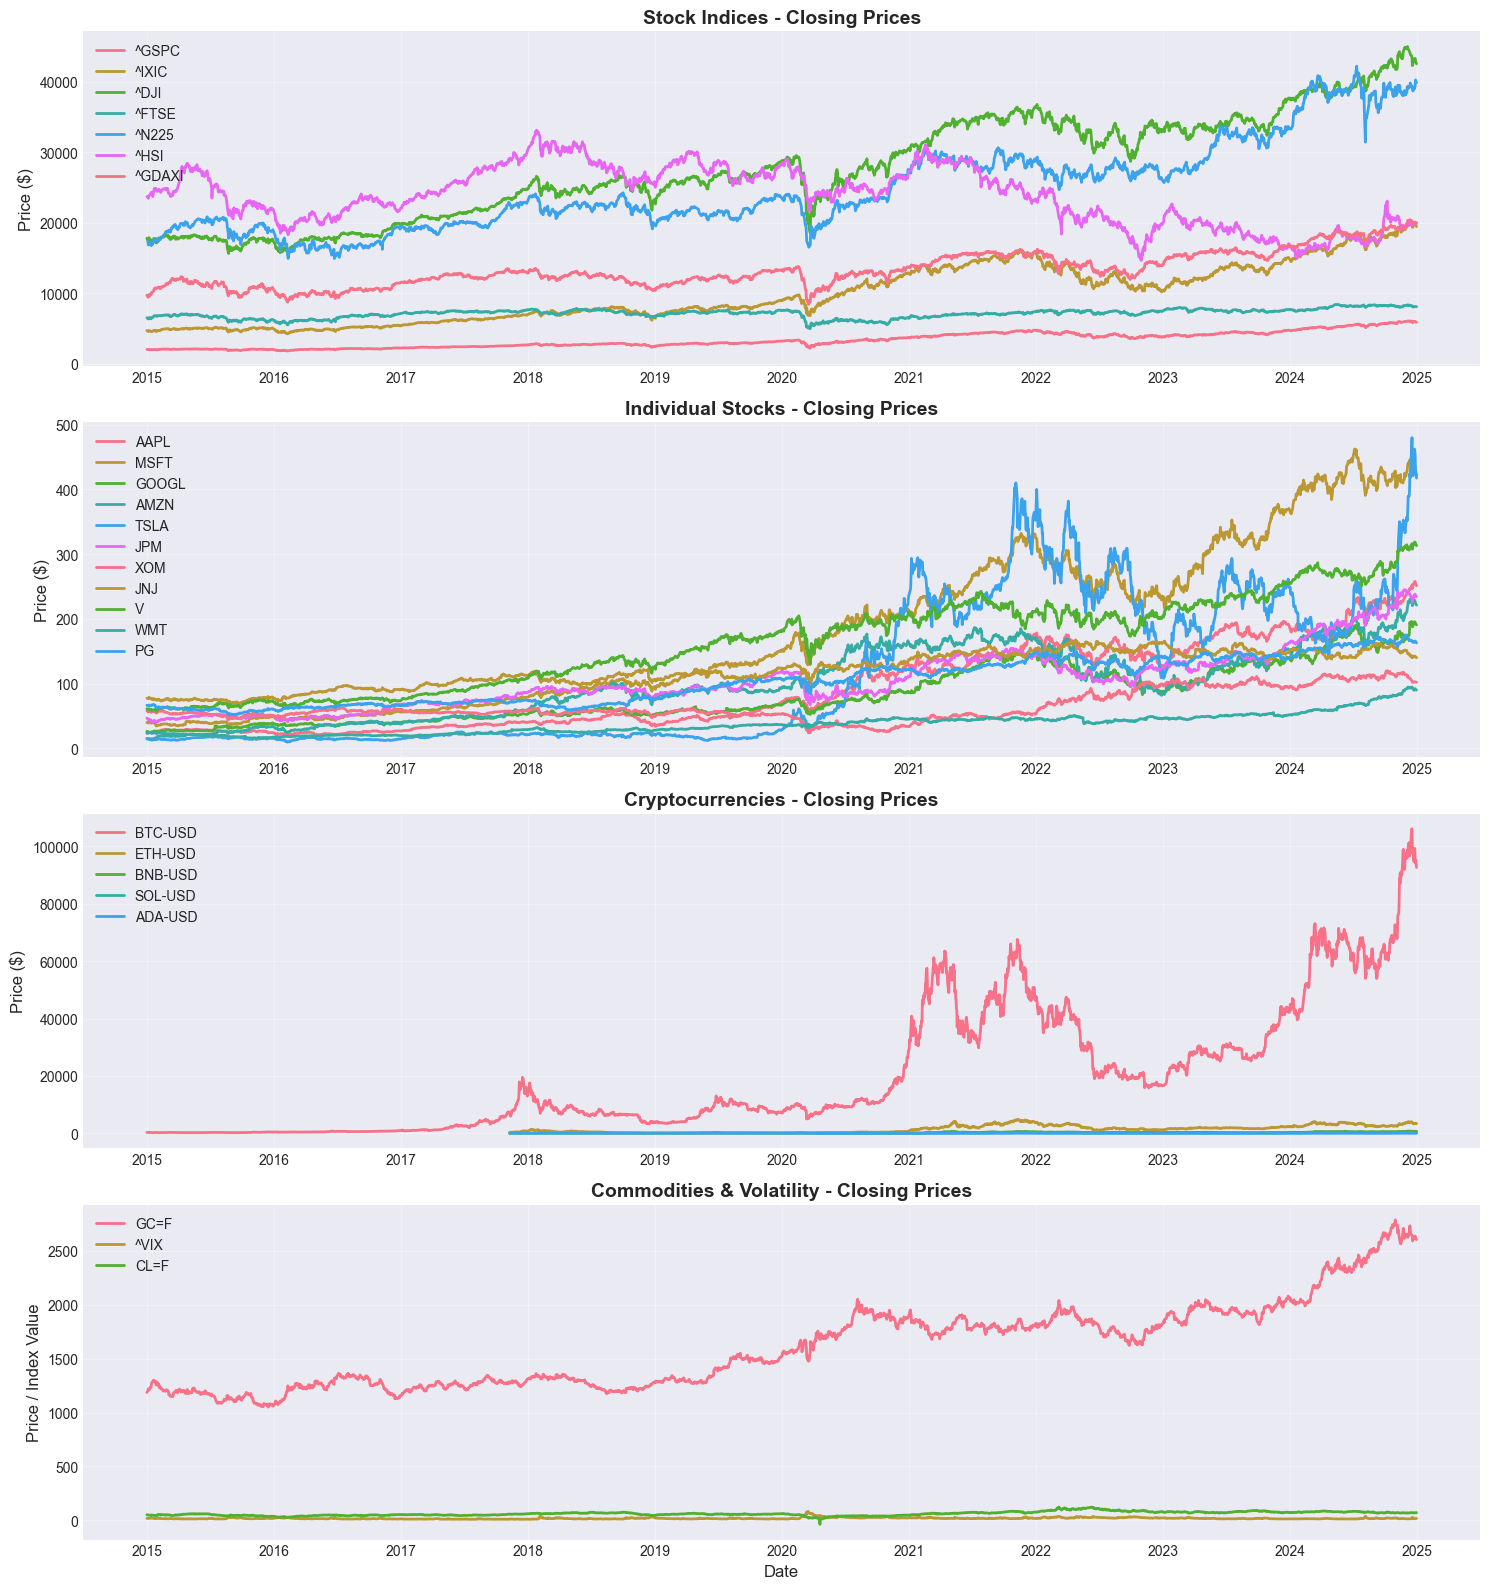

✅ Visualization saved to outputs/figures/01_raw_data_overview.png


In [16]:
# Plot closing prices for all downloaded tickers
fig, axes = plt.subplots(4, 1, figsize=(15, 16))

# Plot indices
ax = axes[0]
for ticker in TICKERS['indices']:
    if ticker in downloaded_data:
        data = downloaded_data[ticker]
        ax.plot(data.index, data['Close'], label=ticker, linewidth=2)
ax.set_title('Stock Indices - Closing Prices', fontsize=14, fontweight='bold')
ax.set_ylabel('Price ($)', fontsize=12)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

# Plot stocks
ax = axes[1]
for ticker in TICKERS['stocks']:
    if ticker in downloaded_data:
        data = downloaded_data[ticker]
        ax.plot(data.index, data['Close'], label=ticker, linewidth=2)
ax.set_title('Individual Stocks - Closing Prices', fontsize=14, fontweight='bold')
ax.set_ylabel('Price ($)', fontsize=12)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

# Plot crypto
ax = axes[2]
for ticker in TICKERS['crypto']:
    if ticker in downloaded_data:
        data = downloaded_data[ticker]
        ax.plot(data.index, data['Close'], label=ticker, linewidth=2)
ax.set_title('Cryptocurrencies - Closing Prices', fontsize=14, fontweight='bold')
ax.set_ylabel('Price ($)', fontsize=12)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

# Plot commodities
ax = axes[3]
for ticker in TICKERS['commodities']:
    if ticker in downloaded_data:
        data = downloaded_data[ticker]
        ax.plot(data.index, data['Close'], label=ticker, linewidth=2)
ax.set_title('Commodities & Volatility - Closing Prices', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price / Index Value', fontsize=12)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../../outputs/figures/01_raw_data_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved to outputs/figures/01_raw_data_overview.png")

## 7. Sample Data Inspection

In [18]:
# Display sample data for S&P 500
if '^GSPC' in downloaded_data:
    sp500 = downloaded_data['^GSPC']
    print("📈 S&P 500 Sample Data (First 5 rows):")
    print(sp500.head())
    print("\n📈 S&P 500 Sample Data (Last 5 rows):")
    print(sp500.tail())
    print("\n📊 S&P 500 Statistics:")
    print(sp500.describe())

📈 S&P 500 Sample Data (First 5 rows):
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2015-01-02  2058.199951  2072.360107  2046.040039  2058.899902  2708700000
2015-01-05  2020.579956  2054.439941  2017.339966  2054.439941  3799120000
2015-01-06  2002.609985  2030.250000  1992.439941  2022.150024  4460110000
2015-01-07  2025.900024  2029.609985  2005.550049  2005.550049  3805480000
2015-01-08  2062.139893  2064.080078  2030.609985  2030.609985  3934010000

📈 S&P 500 Sample Data (Last 5 rows):
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2024-12-23  5974.069824  5978.250000  5902.569824  5940.250000  3593280000
2024-12-24  6040.040039 

## 8. Check for Missing Data

In [19]:
# Check missing values for each ticker
print("🔍 Missing Values Analysis:\n")
for ticker, data in downloaded_data.items():
    missing = data.isnull().sum()
    if missing.sum() > 0:
        print(f"⚠️  {ticker}:")
        print(missing[missing > 0])
        print()
    else:
        print(f"✅ {ticker}: No missing values")

🔍 Missing Values Analysis:

✅ ^GSPC: No missing values
✅ ^IXIC: No missing values
✅ ^DJI: No missing values
✅ ^FTSE: No missing values
✅ ^N225: No missing values
✅ ^HSI: No missing values
✅ ^GDAXI: No missing values
✅ AAPL: No missing values
✅ MSFT: No missing values
✅ GOOGL: No missing values
✅ AMZN: No missing values
✅ TSLA: No missing values
✅ JPM: No missing values
✅ XOM: No missing values
✅ JNJ: No missing values
✅ V: No missing values
✅ WMT: No missing values
✅ PG: No missing values
✅ BTC-USD: No missing values
✅ ETH-USD: No missing values
✅ BNB-USD: No missing values
✅ SOL-USD: No missing values
✅ ADA-USD: No missing values
✅ GC=F: No missing values
✅ ^VIX: No missing values
✅ CL=F: No missing values


## 9. Next Steps

✅ **Data collection complete!**

**Next notebooks to run:**
1. `02_eda_and_stl.ipynb` - Exploratory Data Analysis and STL Decomposition
2. `03_feature_engineering.ipynb` - Calculate returns, volatility, and other features

**Files created:**
- Raw data CSV files in `data/raw/`
- Data summary in `data/raw/_data_summary.csv`
- Visualization in `outputs/figures/01_raw_data_overview.png`